<a href="https://colab.research.google.com/github/dagisky/Deep-Learning-Workshop3/blob/master/Basic%20Deep%20Learning/Autoencoders/denoising_autoencoder.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.utils.data
from torchvision import datasets, transforms
import numpy as np
import pandas as pd

from torch import nn, optim

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
from torch.utils.data import DataLoader

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0, 1)])

# Load the MNIST dataset
mnist_dataset_train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
# Load the test MNIST dataset
mnist_dataset_test = datasets.MNIST( root='./data', train=False, download=True, transform=transform)

batch_size = 128
train_loader = torch.utils.data.DataLoader( mnist_dataset_train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader( mnist_dataset_test, batch_size=5, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 91.5MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 22.6MB/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 59.6MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 5.91MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
class DAE(nn.Module):
    def __init__(self):
        super().__init__()

        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)

        self.fc4 = nn.Linear(128, 256)
        self.fc5 = nn.Linear(256, 512)
        self.fc6 = nn.Linear(512, 784)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def encode(self, x):

        h1 = self.relu(self.fc1(x))
        h2 = self.relu(self.fc2(h1))
        return self.relu(self.fc3(h2))

    def decode(self, z):
        h4 = self.relu(self.fc4(z))
        h5 = self.relu(self.fc5(h4))
        return self.sigmoid(self.fc6(h5))

    def forward(self, x):
        q = self.encode(x.view(-1, 784))

        return self.decode(q)

In [4]:
def train(epoch, model, train_loader, optimizer,  cuda=True):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data.to(device)
        optimizer.zero_grad()

        data_noise = torch.randn(data.shape).to(device)
        data_noise = data + data_noise

        recon_batch = model(data_noise.to(device))
        loss = criterion(recon_batch, data.view(data.size(0), -1).to(device))
        loss.backward()

        train_loss += loss.item() * len(data)
        optimizer.step()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, batch_idx * len(data), len(train_loader.dataset),
                                                                           100. * batch_idx /
                                                                           len(train_loader),
                                                                           loss.item()))

    print('====&gt; Epoch: {} Average loss: {:.4f}'.format(
        epoch, train_loss / len(train_loader.dataset)))


In [5]:
epochs = 10

model = DAE().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.MSELoss()

In [6]:
for epoch in range(1, epochs + 1):
    train(epoch, model, train_loader, optimizer, True)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.231188
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.057703
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.049056
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.043806
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.045970
====&gt; Epoch: 1 Average loss: 0.0523
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.041445
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.043271
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.042283
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.040105
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.037386
====&gt; Epoch: 2 Average loss: 0.0411
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.041297
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.041652
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.039144
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.038459
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.036404
====&gt; Epoch: 3 Average loss: 0.0394
Train Epoch: 4 [0/60000 (0%)]	Loss: 0.038147
Train Epoch: 4 [12800/60000 (21%)]	Loss: 0.037623
Train Epoch: 4 [25600/60000 (43%)]	Loss: 0.038417
Tra

Image 0 with label 7Image 1 with label 2Image 2 with label 1Image 3 with label 0Image 4 with label 4

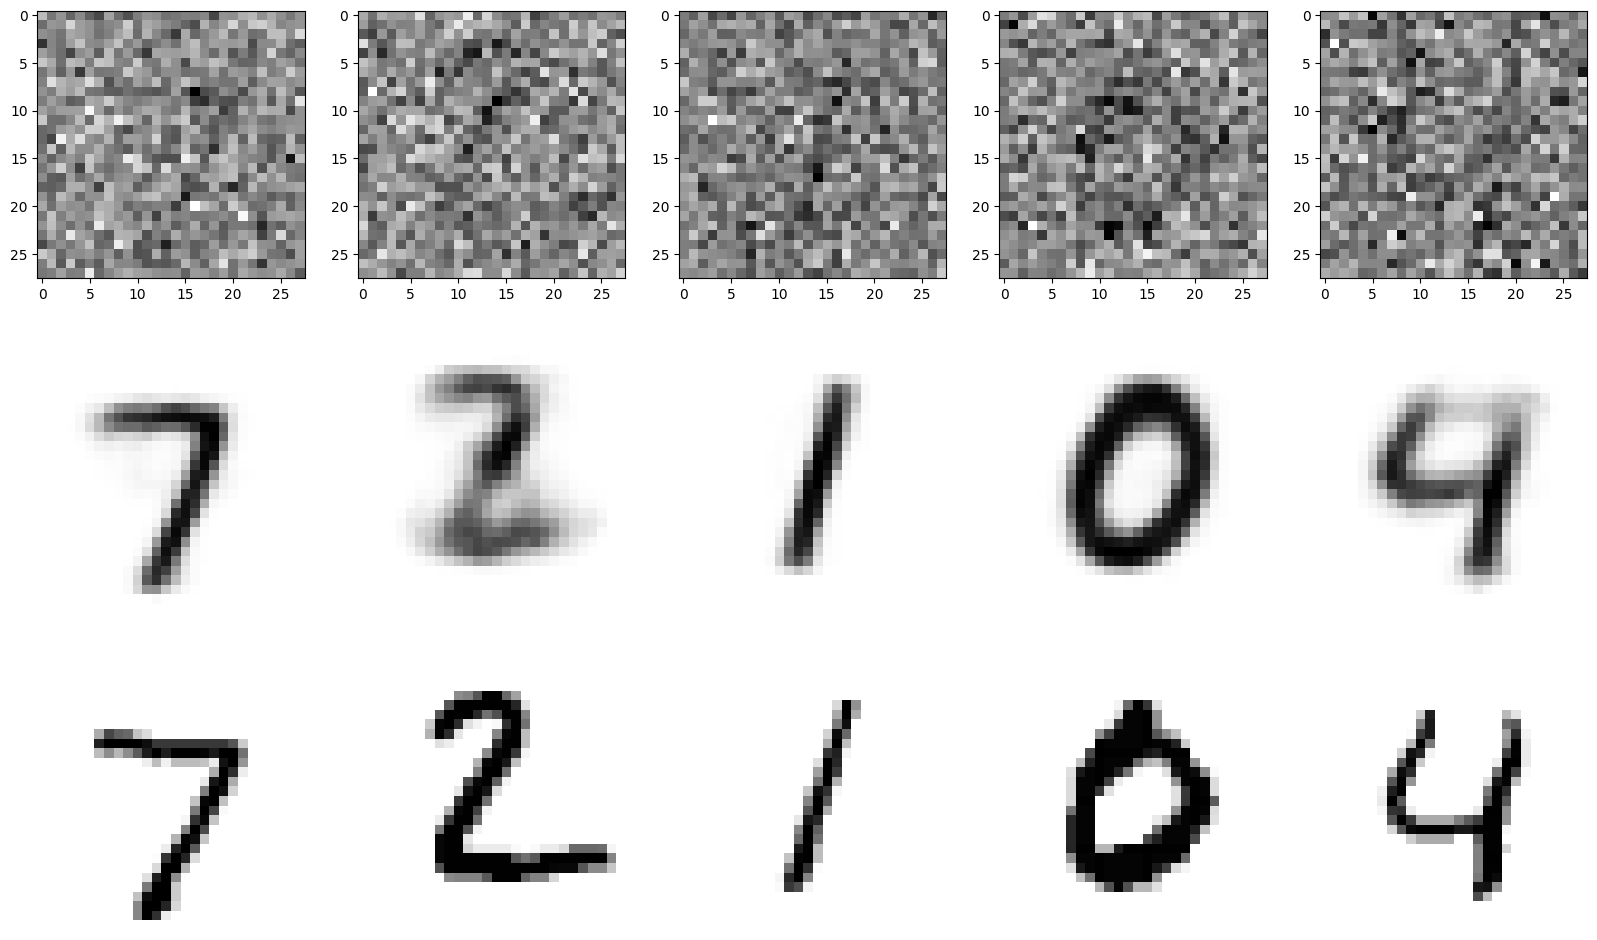

In [8]:
import matplotlib.pyplot as plt
for batch_idx, (data, labels) in enumerate(test_loader):
    data.to(device)
    optimizer.zero_grad()

    data_noise = torch.randn(data.shape).to(device)
    data_noise = data + data_noise

    recon_batch = model(data_noise.to(device))
    break


plt.figure(figsize=(20, 12))
for i in range(5):

    print(f"Image {i} with label {labels[i]}", end="")
    plt.subplot(3, 5, 1+i)
    plt.imshow(data_noise[i, :, :, :].view(
        28, 28).detach().numpy(), cmap='binary')
    plt.subplot(3, 5, 6+i)
    plt.imshow(recon_batch[i, :].view(28, 28).detach().numpy(), cmap='binary')
    plt.axis('off')
    plt.subplot(3, 5, 11+i)
    plt.imshow(data[i, :, :, :].view(28, 28).detach().numpy(), cmap='binary')
    plt.axis('off')
plt.show()
